# STEPS TO To get scrap Crypto website API:


# go to the website, scroll down and click on crypto API.
# signin if you have an account, if not then create an account to log you in.
# click on the documentation, under quick guide click on python, then copy the code and paste it on jupyter notebook.
# click on the documentation, under authentication copy the first website known as domain key and come and use it to replace the one first part of the url on jupyter notebook
# copy the API key and use it to replace the key in the header.


In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7b2e75ce-4d88-4ba4-a273-5d36d3c24323',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

# I had to go and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# into the Anaconda prompt to change this to allow to pull data
# i also copy the link there to jupyter for it to work.

{'status': {'timestamp': '2023-11-10T14:22:22.790Z', 'error_code': 0, 'error_message': None, 'elapsed': 31, 'credit_count': 1, 'notice': None, 'total_count': 8819}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10551, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
type(data)

dict

In [4]:
import pandas as pd

pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", None)

In [5]:
df = pd.json_normalize(data["data"])

df['timestamp'] = pd.to_datetime("now") #Adding new column

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10551,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.953842e+07,1.953842e+07,False,NaN,1,NaN,NaN,None,2023-11-10T14:21:00.000Z,37010.194366,3.219505e+10,11.0212,-0.381980,-1.428496,7.110364,36.508937,45.722630,25.849110,7.231209e+11,51.6177,7.772141e+11,None,2023-11-10T14:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 15:23:04.011468
1,1027,Ethereum,ETH,ethereum,7749,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202636e+08,1.202636e+08,True,NaN,2,NaN,NaN,None,2023-11-10T14:21:00.000Z,2076.488477,2.693563e+10,144.8748,-0.299155,7.468722,15.128226,32.139792,31.680998,12.146785,2.497259e+11,17.8259,2.497259e+11,None,2023-11-10T14:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 15:23:04.011468
2,825,Tether USDt,USDT,tether,65504,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.651725e+10,8.962366e+10,True,NaN,3,NaN,NaN,None,2023-11-10T14:20:00.000Z,1.000218,7.143499e+10,51.0315,-0.006439,-0.004150,-0.010211,0.023029,0.011452,0.067707,8.653613e+10,6.1870,8.964321e+10,None,2023-11-10T14:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-10 15:23:04.011468
3,1839,BNB,BNB,bnb,1753,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517020e+08,1.517020e+08,False,NaN,4,NaN,NaN,None,2023-11-10T14:20:00.000Z,249.669774,1.164379e+09,43.1635,-0.959377,-0.332206,9.266484,20.591419,20.634133,3.706930,3.787541e+10,2.7124,3.787541e+10,None,2023-11-10T14:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 15:23:04.011468
4,52,XRP,XRP,xrp,1139,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.365277e+10,9.998824e+10,False,NaN,5,NaN,NaN,None,2023-11-10T14:21:00.000Z,0.645920,2.937123e+09,29.8189,-1.711670,-5.959610,6.041949,32.399693,36.422599,2.672863,3.465538e+10,2.4738,6.459197e+10,None,2023-11-10T14:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 15:23:04.011468
5,3408,USDC,USDC,usd-coin,14861,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.402628e+10,2.402628e+10,False,NaN,6,NaN,NaN,None,2023-11-10T14:21:00.000Z,1.000154,7.642139e+09,43.7110,0.011042,0.023533,0.003922,0.014407,-0.000061,0.005640,2.402997e+10,1.7181,2.402997e+10,None,2023-11-10T14:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-10 15:23:04.011468
6,5426,Solana,SOL,solana,545,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.210170e+08,5.621188e+08,True,NaN,7,NaN,NaN,None,2023-11-10T14:21:00.000Z,49.729808,3.364566e+09,68.7599,-2.245940,4.200156,25.925124,123.966011,182.794509,102.713141,2.093709e+10,1.4945,2.795406e+10,None,2023-11-10T14:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 15:23:04.011468
7,2010,Cardano,ADA,cardano,970,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.526485e+10,3.633522e+10,False,NaN,8,NaN,NaN,None,2023-11-10T14:20:00.000Z,0.366824,7.373040e+08,71.6642,-2.193691,-2.920700,14.852804,47.745829,50.369287,24.883664,1.293598e+10,0.9249,1.650706e+10,None,2023-11-10T14:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 15:23:04.011468
8,74,Dogecoin,DOGE,dogecoin,822,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.

In [7]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '7b2e75ce-4d88-4ba4-a273-5d36d3c24323',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

# I had to go and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# into the Anaconda prompt to change this to allow to pull data
# i also copy the link there to jupyter for it to work.

    df = pd.json_normalize(data["data"])
    df['timestamp'] = pd.to_datetime("now")
    df 
    
    if not os.path.isfile(r"C:\Users\DAVID\Desktop\LEARN PYTHON\pandas\API.csv"):
        df.to_csv(r"C:\Users\DAVID\Desktop\LEARN PYTHON\pandas\API.csv", header = "column_names")
    else:
        df.to_csv(r"C:\Users\DAVID\Desktop\LEARN PYTHON\pandas\API.csv", mode = "a", header = False)
        
    
   

In [8]:
import os
from time import time 
from time import sleep

for item in range(333):
    api_runner()
    print("API Runner completed.")
    sleep(2) # sleep for one minute

exit()

API Runner completed.
API Runner completed.
API Runner completed.
API Runner completed.
API Runner completed.
API Runner completed.
API Runner completed.
API Runner completed.
API Runner completed.
API Runner completed.
API Runner completed.


KeyboardInterrupt: 

In [10]:
df0 = pd.read_csv(r"C:\Users\DAVID\Desktop\LEARN PYTHON\pandas\API.csv")
df0.head()


,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10512,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.952461e+07,1.952461e+07,False,NaN,1,NaN,NaN,NaN,2023-10-26T15:46:00.000Z,33908.395126,2.235494e+10,-20.9795,-0.668264,-2.880447,17.901443,29.717697,29.724841,15.363414,6.620483e+11,53.0471,7.120763e+11,NaN,2023-10-26T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-26 16:47:53.710315
1,1,1027,Ethereum,ETH,ethereum,7629,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202600e+08,1.202600e+08,True,NaN,2,NaN,NaN,NaN,2023-10-26T15:46:00.000Z,1770.020586,1.143170e+10,13.3684,-0.770373,-2.246499,13.194633,11.795911,6.829248,-5.646646,2.128627e+11,17.0779,2.128627e+11,NaN,2023-10-26T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-26 16:47:53.710315
2,2,825,Tether USDt,USDT,tether,64438,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.439156e+10,8.762567e+10,True,NaN,3,NaN,NaN,NaN,2023-10-26T15:45:00.000Z,1.000115,3.751495e+10,-4.4991,-0.019434,-0.046028,-0.032120,0.036724,0.057218,0.010425,8.440124e+10,6.7715,8.763572e+10,NaN,2023-10-26T15:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-26 16:47:53.710315
3,3,1839,BNB,BNB,bnb,1701,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.517044e+08,1.517044e+08,False,NaN,4,NaN,NaN,NaN,2023-10-26T15:45:00.000Z,220.218818,4.960743e+08,20.2278,-0.402464,-2.921354,4.483301,4.319576,0.715226,-8.932312,3.340817e+10,2.6769,3.340817e+10,NaN,2023-10-26T15:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-26 16:47:53.710315
4,4,52,XRP,XRP,xrp,1123,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.344103e+10,9.998836e+10,False,NaN,5,NaN,NaN,NaN,2023-10-26T15:46:00.000Z,0.544561,1.529314e+09,-0.7457,-0.725217,-2.567458,11.899047,8.666038,3.161332,-23.587819,2.910191e+10,2.3348,5.445611e+10,NaN,2023-10-26T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-26 16:47:53.710315


# Data Cleaning

In [11]:
pd.set_option("display.float_format", lambda x: "%.5f" % x)
pd.set_option("display.max_rows", None)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10551,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19538425.00000,19538425.00000,False,NaN,1,NaN,NaN,None,2023-11-10T14:24:00.000Z,36996.53281,32092882873.89996,10.07270,-0.33511,-1.74189,6.80289,36.44180,45.66892,25.79103,722853981624.99292,51.59860,776927189071.02002,None,2023-11-10T14:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 15:25:45.661217
1,1027,Ethereum,ETH,ethereum,7749,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120263563.63084,120263563.63084,True,NaN,2,NaN,NaN,None,2023-11-10T14:24:00.000Z,2073.93351,26924966905.14607,143.64840,-0.36125,6.79370,14.70592,31.96248,31.44445,12.00797,249418634917.71075,17.80400,249418634917.70999,None,2023-11-10T14:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 15:25:45.661217
2,825,Tether USDt,USDT,tether,65504,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,86517250035.31322,89623656723.43338,True,NaN,3,NaN,NaN,None,2023-11-10T14:23:00.000Z,1.00029,71348584746.68970,50.35740,-0.00020,0.00011,-0.01024,0.02514,0.06849,0.08791,86541932534.59315,6.18740,89649225449.23000,None,2023-11-10T14:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-10 15:25:45.661217
3,1839,BNB,BNB,bnb,1753,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151702025.39783,151702025.39783,False,NaN,4,NaN,NaN,None,2023-11-10T14:23:00.000Z,249.54678,1163752188.37887,42.79280,-0.93281,-0.53119,9.16481,20.50314,20.56869,3.66863,37856751827.89183,2.70230,37856751827.89000,None,2023-11-10T14:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 15:25:45.661217
4,52,XRP,XRP,xrp,1139,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53652766196.00000,99988240531.00000,False,NaN,5,NaN,NaN,None,2023-11-10T14:24:00.000Z,0.64600,2934563116.64492,29.53320,-1.53306,-6.00895,6.06270,32.37220,36.33833,2.68748,34659494885.99431,2.47410,64599642000.52000,None,2023-11-10T14:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 15:25:45.661217
5,3408,USDC,USDC,usd-coin,14861,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24026275116.00924,24026275116.00924,False,NaN,6,NaN,NaN,None,2023-11-10T14:23:00.000Z,1.00009,7652164739.66884,43.38770,0.00028,0.01611,-0.00143,0.00826,0.00718,0.00452,24028321537.12121,1.71790,24028321537.12000,None,2023-11-10T14:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-10 15:25:45.661217
6,5426,Solana,SOL,solana,545,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,421016977.43504,562118762.72791,True,NaN,7,NaN,NaN,None,2023-11-10T14:24:00.000Z,49.76210,3363956607.52116,67.61970,-2.06410,3.78984,25.65608,124.11307,182.38493,102.80314,20950688733.50318,1.49550,27972209816.63000,None,2023-11-10T14:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 15:25:45.661217
7,2010,Cardano,ADA,cardano,970,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35264848597.32900,36335222697.08800,False,NaN,8,NaN,NaN,None,2023-11-10T14:23:00.000Z,0.36677,735775427.40937,70.30150,-2.12658,-3.07319,14.66230,47.73282,50.33279,24.84798,12933976030.49447,0.92470,16504506456.79000,None,2023-11-10T14:23:00.000Z,Na

In [12]:
df3 = df.groupby("name", sort=False)[["quote.USD.percent_change_1h", "quote.USD.percent_change_24h", "quote.USD.percent_change_7d", "quote.USD.percent_change_30d", "quote.USD.percent_change_60d", "quote.USD.percent_change_90d"]].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.33511,-1.74189,6.80289,36.44180,45.66892,25.79103
Ethereum,-0.36125,6.79370,14.70592,31.96248,31.44445,12.00797
Tether USDt,-0.00020,0.00011,-0.01024,0.02514,0.06849,0.08791
BNB,-0.93281,-0.53119,9.16481,20.50314,20.56869,3.66863
XRP,-1.53306,-6.00895,6.06270,32.37220,36.33833,2.68748
USDC,0.00028,0.01611,-0.00143,0.00826,0.00718,0.00452
Solana,-2.06410,3.78984,25.65608,124.11307,182.38493,102.80314
Cardano,-2.12658,-3.07319,14.66230,47.73282,50.33279,24.84798
Dogecoin,-1.56955,-4.36373,8.47630,24.78580,21.71973,-4.44731


In [13]:
# To visualize this data do the following:

In [14]:
df4 = df3.transpose()
df4

name,Bitcoin,Ethereum,Tether USDt,BNB,XRP,USDC,Solana,Cardano,Dogecoin,TRON,Toncoin,Chainlink,Polygon,Polkadot,Wrapped Bitcoin
quote.USD.percent_change_1h,-0.33511,-0.36125,-0.00020,-0.93281,-1.53306,0.00028,-2.06410,-2.12658,-1.56955,-1.49688,-1.97007,-0.11771,-1.71686,-1.87941,-0.26569
quote.USD.percent_change_24h,-1.74189,6.79370,0.00011,-0.53119,-6.00895,0.01611,3.78984,-3.07319,-4.36373,4.14346,-2.30093,-4.05869,-1.19699,-2.42451,-1.43556
quote.USD.percent_change_7d,6.80289,14.70592,-0.01024,9.16481,6.06270,-0.00143,25.65608,14.66230,8.47630,6.83357,9.37160,33.32073,24.29502,10.25257,7.29576
quote.USD.percent_change_30d,36.44180,31.96248,0.02514,20.50314,32.37220,0.00826,124.11307,47.73282,24.78580,20.73919,21.32212,101.86619,59.08582,33.50115,36.28915
quote.USD.percent_change_60d,45.66892,31.44445,0.06849,20.56869,36.33833,0.00718,182.38493,50.33279,21.71973,34.78531,44.77750,153.03274,63.58493,25.54708,45.66729
quote.USD.percent_change_90d,25.79103,12.00797,0.08791,3.66863,2.68748,0.00452,102.80314,24.84798,-4.44731,34.85881,85.70576,99.82179,20.81046,0.06351,25.75929


In [15]:
df4 = df3.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h     -0.33511
                 quote.USD.percent_change_24h    -1.74189
                 quote.USD.percent_change_7d      6.80289
                 quote.USD.percent_change_30d    36.44180
                 quote.USD.percent_change_60d    45.66892
                 quote.USD.percent_change_90d    25.79103
Ethereum         quote.USD.percent_change_1h     -0.36125
                 quote.USD.percent_change_24h     6.79370
                 quote.USD.percent_change_7d     14.70592
                 quote.USD.percent_change_30d    31.96248
                 quote.USD.percent_change_60d    31.44445
                 quote.USD.percent_change_90d    12.00797
Tether USDt      quote.USD.percent_change_1h     -0.00020
                 quote.USD.percent_change_24h     0.00011
                 quote.USD.percent_change_7d     -0.01024
                 quote.USD.percent_change_30d     0.02514
                 quote.USD

In [16]:
type(df3)

pandas.core.frame.DataFrame

In [17]:
type(df4)

pandas.core.series.Series

In [18]:
df5 = df4.to_frame(name = "values")
df5

values
name                                                  
Bitcoin         quote.USD.percent_change_1h   -0.33511
                quote.USD.percent_change_24h  -1.74189
                quote.USD.percent_change_7d    6.80289
                quote.USD.percent_change_30d  36.44180
                quote.USD.percent_change_60d  45.66892
                quote.USD.percent_change_90d  25.79103
Ethereum        quote.USD.percent_change_1h   -0.36125
                quote.USD.percent_change_24h   6.79370
                quote.USD.percent_change_7d   14.70592
                quote.USD.percent_change_30d  31.96248
                quote.USD.percent_change_60d  31.44445
                quote.USD.percent_change_90d  12.00797
Tether USDt     quote.USD.percent_change_1h   -0.00020
                quote.USD.percent_change_24h   0.00011
                quote.USD.percent_change_7d   -0.01024
                quote.USD.percent_change_30d   0.02514
                quote.USD.percent_change_60d   0.06849
                quote.USD.percent_change_90d   0.08791
BNB             quote.USD.percent_change_1h   -0.93281
                quote.USD.percent_change_24h  -0.53119
                quote.USD.percent_change_7d    9.16481
                quote.USD.percent_change_30d  20.50314
                quote.USD.percent_change_60d  20.56869
                quote.USD.percent_change_90d   3.66863
XRP             quote.USD.percent_change_1h   -1.53306
                quote.USD.percent_change_24h  -6.00895
                quote.USD.percent_change_7d    6.06270
                quote.USD.percent_change_30d  32.37220
                quote.USD.percent_change_60d  36.33833
                quote.USD.percent_change_90d   2.68748
USDC            quote.USD.percent_change_1h    0.00028
                quote.USD.percent_change_24h   0.01611
                quote.USD.percent_change_7d   -0.00143
                quote.USD.percent_change_30d   0.00826
                quote.USD.percent_change_60d   0.00718
                quote.USD.percent_change_90d   0.00452
Solana          quote.USD.percent_change_1h   -2.06410
                quote.USD.percent_change_24h   3.78984
                quote.USD.percent_change_7d   25.65608
                quote.USD.percent_change_30d 124.11307
                quote.USD.percent_change_60d 182.38493
                quote.USD.percent_change_90d 102.80314
Cardano         quote.USD.percent_change_1h   -2.12658
                quote.USD.percent_change_24h  -3.07319
                quote.USD.percent_change_7d   14.66230
                quote.USD.percent_change_30d  47.73282
                quote.USD.percent_change_60d  50.33279
                quote.USD.percent_change_90d  24.84798
Dogecoin        quote.USD.percent_change_1h   -1.56955
                quote.USD.percent_change_24h  -4.36373
                quote.USD.percent_change_7d    8.47630
                quote.USD.percent_change_30d  24.78580
                quote.USD.percent_change_60d  21.71973
                quote.USD.percent_change_90d  -4.44731
TRON            quote.USD.percent_change_1h   -1.49688
                quote.USD.percent_change_24h   4.14346
                quote.USD.percent_change_7d    6.83357
                quote.USD.percent_change_30d  20.73919
                quote.USD.percent_change_60d  34.78531
                quote.USD.percent_change_90d  34.85881
Toncoin         quote.USD.percent_change_1h   -1.97007
                quote.USD.percent_change_24h  -2.30093
                quote.USD.percent_change_7d    9.37160
                quote.USD.percent_change_30d  21.32212
                quote.USD.percent_change_60d  44.77750
                quote.USD.percent_change_90d  85.70576
Chainlink       quote.USD.percent_change_1h   -0.11771
                quote.USD.percent_change_24h  -4.05869
                quote.USD.percent_change_7d   33.32073
                quote.USD.percent_change_30d 101.86619
                quote.USD.percent_change_60d 153.03274
                quote.USD.percent

In [19]:
df5.count()



values    90
dtype: int64

In [20]:
index = pd.Index(range(90))

#df6 = df5.set_index(index)
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.33511
1,Bitcoin,quote.USD.percent_change_24h,-1.74189
2,Bitcoin,quote.USD.percent_change_7d,6.80289
3,Bitcoin,quote.USD.percent_change_30d,36.44180
4,Bitcoin,quote.USD.percent_change_60d,45.66892
5,Bitcoin,quote.USD.percent_change_90d,25.79103
6,Ethereum,quote.USD.percent_change_1h,-0.36125
7,Ethereum,quote.USD.percent_change_24h,6.79370
8,Ethereum,quote.USD.percent_change_7d,14.70592
9,Ethereum,quote.USD.percent_change_30d,31.96248


In [21]:
df7 = df6.rename(columns={"level_1":"percent_change"})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.33511
1,Bitcoin,quote.USD.percent_change_24h,-1.74189
2,Bitcoin,quote.USD.percent_change_7d,6.80289
3,Bitcoin,quote.USD.percent_change_30d,36.44180
4,Bitcoin,quote.USD.percent_change_60d,45.66892
5,Bitcoin,quote.USD.percent_change_90d,25.79103
6,Ethereum,quote.USD.percent_change_1h,-0.36125
7,Ethereum,quote.USD.percent_change_24h,6.79370
8,Ethereum,quote.USD.percent_change_7d,14.70592
9,Ethereum,quote.USD.percent_change_30d,31.96248


In [22]:
df7["percent_change"] = df7["percent_change"].replace(["quote.USD.percent_change_1h", "quote.USD.percent_change_24h", "quote.USD.percent_change_7d", "quote.USD.percent_change_30d", "quote.USD.percent_change_60d", "quote.USD.percent_change_90d"],["1h", "24h", "7d", "30d", "60d", "90d"])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.33511
1,Bitcoin,24h,-1.74189
2,Bitcoin,7d,6.80289
3,Bitcoin,30d,36.44180
4,Bitcoin,60d,45.66892
5,Bitcoin,90d,25.79103
6,Ethereum,1h,-0.36125
7,Ethereum,24h,6.79370
8,Ethereum,7d,14.70592
9,Ethereum,30d,31.96248


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\DAVID\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


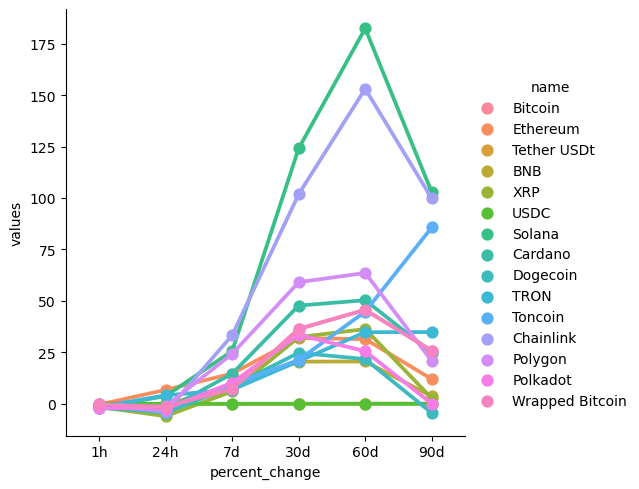

In [24]:
sns.catplot(x = "percent_change", y = "values", hue= "name", data = df7, kind = "point")

In [25]:
df8 = df[["name", "quote.USD.price", "timestamp"]]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,36996.53281,2023-11-10 15:25:45.661217
